In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
link1 = "https://datasets.imdbws.com/name.basics.tsv.gz"
df1 = pd.read_csv(link1, sep="\t", compression='gzip')
df1

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0045537,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0037382,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0050986,tt0083922,tt0069467"
...,...,...,...,...,...,...
12533738,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt11657662,tt2455546"
12533739,nm9993716,Essias Loberg,\N,\N,NaN,\N
12533740,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12533741,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [3]:
df1.isnull().sum()

nconst                     0
primaryName                3
birthYear                  0
deathYear                  0
primaryProfession    2730773
knownForTitles             0
dtype: int64

In [4]:
# select actor and actress
df1 = df1.loc[df1['primaryProfession'].isin(['actor', 'actress'])]

In [5]:
# select not null values on primaryName column
df1 = df1[df1['primaryName'].notna()]

In [6]:
df1.isnull().sum()

nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

In [7]:
# eliminate \\N for knownForTitles column
df1 = df1[df1.knownForTitles != '\\N']

In [8]:
# select only the columns we need
df1 = df1[['nconst','primaryName','knownForTitles']].reset_index(drop=True)
df1

,nconst,primaryName,knownForTitles
0,nm0000109,Yasmine Bleeth,"tt0337851,tt0115285,tt0131857,tt0096542"
1,nm0000124,Jennifer Connelly,"tt0180093,tt0268978,tt0315983,tt0102803"
2,nm0000143,Erika Eleniak,"tt0094761,tt0106400,tt0105690,tt0083866"
3,nm0000282,Scott Bairstow,"tt0119925,tt0120512,tt0182587,tt0283084"
4,nm0000283,Brenda Bakke,"tt0114608,tt0107144,tt0114781,tt0119488"
...,...,...,...
3309397,nm9993693,Apsara Rani,"tt12856788,tt8302382,tt13847502,tt8737752"
3309398,nm9993698,Sebi John,tt8736744
3309399,nm9993699,Dani Jacob,tt8736744
3309400,nm9993701,Sanjai Kuriakose,tt8736744


In [9]:
# df1.to_csv('df1_not_exploded', index=False)

In [10]:
# check the number of unique values on primaryName column
df1.primaryName.nunique()

2922239

In [11]:
df1['knownForTitles'] = df1.knownForTitles.apply(lambda x: x.split(','))
df1 = df1.explode('knownForTitles')
df1

,nconst,primaryName,knownForTitles
0,nm0000109,Yasmine Bleeth,tt0337851
0,nm0000109,Yasmine Bleeth,tt0115285
0,nm0000109,Yasmine Bleeth,tt0131857
0,nm0000109,Yasmine Bleeth,tt0096542
1,nm0000124,Jennifer Connelly,tt0180093
...,...,...,...
3309400,nm9993701,Sanjai Kuriakose,tt8736744
3309401,nm9993703,James Craigmyle,tt6914160
3309401,nm9993703,James Craigmyle,tt6225166
3309401,nm9993703,James Craigmyle,tt11212278


In [12]:
#df1.to_csv('df1_actor_names_titles.csv', index=False)

In [13]:
link3 = "https://datasets.imdbws.com/title.basics.tsv.gz"
df3 = pd.read_csv(link3, sep="\t", compression='gzip')
df3.head()

C:\Users\Bengü\AppData\Local\Temp\ipykernel_14896\3514975157.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(link3, sep="\t", compression='gzip')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
# select not null values on originalTitle column
df3 = df3[df3['primaryTitle'].notna()]

In [15]:
# select only movies
df3 = df3[df3.titleType == 'movie']

In [16]:
df3 = df3[df3.startYear != '\\N']
df3 = df3[df3.runtimeMinutes != '\\N']
df3.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama


In [17]:
df3 = df3[['tconst','primaryTitle','startYear','runtimeMinutes']].reset_index(drop=True)
df3.head(5)

,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0000009,Miss Jerry,1894,45
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100
2,tt0000502,Bohemios,1905,100
3,tt0000574,The Story of the Kelly Gang,1906,70
4,tt0000591,The Prodigal Son,1907,90


In [18]:
df3.isna().sum()

tconst            0
primaryTitle      0
startYear         0
runtimeMinutes    0
dtype: int64

In [19]:
#df3.to_csv('df3_movie_names_genres.csv', index=False)

In [20]:
import os
os.getcwd()

'c:\\Users\\Bengü\\Documents\\GitHub\\final_final_movie\\My-movie-review-prediction'

In [21]:
#os.chdir('c:\\Users\\Bengü\\Documents\\GitHub\\My-movie-review-prediction')

In [22]:
df_merged1 = df3.merge(df1.rename({'knownForTitles':'tconst'}, axis='columns'), on='tconst', how='left')
df_merged1 = df_merged1.dropna(subset=['nconst'])
# df_merged1.drop(['runtimeMinutes', 'startYear'], axis=1, inplace=True)
df_merged1

,tconst,primaryTitle,startYear,runtimeMinutes,nconst,primaryName
0,tt0000009,Miss Jerry,1894,45,nm0063086,Blanche Bayliss
1,tt0000009,Miss Jerry,1894,45,nm0183823,William Courtenay
3,tt0000502,Bohemios,1905,100,nm0215752,Antonio del Pozo
4,tt0000502,Bohemios,1905,100,nm0252720,El Mochuelo
5,tt0000574,The Story of the Kelly Gang,1906,70,nm0143899,Godfrey Cass
...,...,...,...,...,...,...
2199896,tt9916538,Kuambil Lagi Hatiku,2019,123,nm4936523,Kedung Darma R.
2199897,tt9916538,Kuambil Lagi Hatiku,2019,123,nm8678236,Lala Karmela
2199899,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,nm0033355,Ramiro Arbeláez
2199900,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,nm3041223,Jaime Osorio


In [23]:
# df_merged1.to_csv('df_merged_movie_actor.csv', index=False)

In [24]:
link7 = "https://datasets.imdbws.com/title.ratings.tsv.gz"
df7 = pd.read_csv(link7, sep="\t", compression='gzip')
df7

,tconst,averageRating,numVotes
0,tt0000001,5.7,1972
1,tt0000002,5.8,264
2,tt0000003,6.5,1819
3,tt0000004,5.6,178
4,tt0000005,6.2,2615
...,...,...,...
1312111,tt9916730,8.3,10
1312112,tt9916766,7.0,21
1312113,tt9916778,7.2,36
1312114,tt9916840,7.5,7


In [25]:
df7.dropna(inplace=True)

In [26]:
df = df_merged1.merge(df7, on='tconst', how='left')
df.dropna(inplace=True)

In [27]:
df

,tconst,primaryTitle,startYear,runtimeMinutes,nconst,primaryName,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,nm0063086,Blanche Bayliss,5.3,204.0
1,tt0000009,Miss Jerry,1894,45,nm0183823,William Courtenay,5.3,204.0
2,tt0000502,Bohemios,1905,100,nm0215752,Antonio del Pozo,4.1,15.0
3,tt0000502,Bohemios,1905,100,nm0252720,El Mochuelo,4.1,15.0
4,tt0000574,The Story of the Kelly Gang,1906,70,nm0143899,Godfrey Cass,6.0,826.0
...,...,...,...,...,...,...,...,...
2071291,tt9916538,Kuambil Lagi Hatiku,2019,123,nm10041459,Sahil Shah,8.6,7.0
2071292,tt9916538,Kuambil Lagi Hatiku,2019,123,nm3369416,Yati Pesek,8.6,7.0
2071293,tt9916538,Kuambil Lagi Hatiku,2019,123,nm4936523,Kedung Darma R.,8.6,7.0
2071294,tt9916538,Kuambil Lagi Hatiku,2019,123,nm8678236,Lala Karmela,8.6,7.0


In [28]:
# df.to_csv('df_actor_avgrating.csv', index=False)

In [29]:
df = df[df['numVotes'] > 7804]

In [30]:
# remove rows with non-english characters on actor names
df = df[df['primaryName'].apply(lambda x: bool(re.match('^[a-zA-Z0-9\s]+$', x)))]
# remove rows with punctuations and numbers on actor names
df = df[~df['primaryName'].str.contains('[^\w\s]')]
df = df[~df['primaryName'].str.contains(r'\d+')]

In [31]:
def weighted_average(group):
  return (group['averageRating'] * group['numVotes']).sum() / group['numVotes'].sum()

df_actor_rating = df.groupby('primaryName').apply(weighted_average).reset_index(name='weighted_average')
df_actor_rating

,primaryName,weighted_average
0,AJ Diana,6.900000
1,AJ Kane,7.400000
2,AJ Littlejohn,6.200000
3,AJ Meijer,6.300000
4,AJ Taylor,7.716852
...,...,...
141608,Zwelithin Mathebula,6.500000
141609,Zwi Kanar,7.600000
141610,Zyad Bin Hijab,1.000000
141611,Zygmunt Szajowski,7.300000


In [32]:
# df_actor_rating.to_csv('df_actor_avgrating.csv', index=False)

In [33]:
df_actor_rating = df_actor_rating.merge(df_merged1, on='primaryName', how='left')
df_actor_rating

,primaryName,weighted_average,tconst,primaryTitle,startYear,runtimeMinutes,nconst
0,AJ Diana,6.9,tt1549572,Another Earth,2011,92,nm4543466
1,AJ Kane,7.4,tt2386490,How to Train Your Dragon: The Hidden World,2019,104,nm7851743
2,AJ Littlejohn,6.2,tt3155328,Win It All,2017,88,nm5366782
3,AJ Meijer,6.3,tt15185022,See You Next Christmas,2021,99,nm2973791
4,AJ Meijer,6.3,tt2503954,Broken Horses,2015,101,nm2973791
...,...,...,...,...,...,...,...
291208,Zwi Kanar,7.6,tt0202077,Voyages,1999,115,nm0437108
291209,Zwi Kanar,7.6,tt0486580,Forgiveness,2006,97,nm0437108
291210,Zyad Bin Hijab,1.0,tt13423846,321 Action,2020,100,nm12046861
291211,Zygmunt Szajowski,7.3,tt4385888,20th Century Women,2016,119,nm5284622


In [34]:
# df_actor_rating.to_csv('df_actor_avgrating.csv', index=False)

In [35]:
import langid
langid.set_languages(['en','fr', 'it', 'sv', 'es', 'zh'])
df_actor_rating['lang'] = df_actor_rating['primaryTitle'].apply(lambda x: langid.classify(x)[0])
df_actor_rating = df_actor_rating[df_actor_rating['lang']=='en']
df_actor_rating = df_actor_rating.drop(columns=['lang'])
df_actor_rating

,primaryName,weighted_average,tconst,primaryTitle,startYear,runtimeMinutes,nconst
0,AJ Diana,6.9,tt1549572,Another Earth,2011,92,nm4543466
1,AJ Kane,7.4,tt2386490,How to Train Your Dragon: The Hidden World,2019,104,nm7851743
2,AJ Littlejohn,6.2,tt3155328,Win It All,2017,88,nm5366782
3,AJ Meijer,6.3,tt15185022,See You Next Christmas,2021,99,nm2973791
4,AJ Meijer,6.3,tt2503954,Broken Horses,2015,101,nm2973791
...,...,...,...,...,...,...,...
291208,Zwi Kanar,7.6,tt0202077,Voyages,1999,115,nm0437108
291209,Zwi Kanar,7.6,tt0486580,Forgiveness,2006,97,nm0437108
291210,Zyad Bin Hijab,1.0,tt13423846,321 Action,2020,100,nm12046861
291211,Zygmunt Szajowski,7.3,tt4385888,20th Century Women,2016,119,nm5284622


In [58]:
table_actor = df_actor_rating[['primaryName', 'weighted_average', 'primaryTitle', 'startYear', 'runtimeMinutes']].sort_values(by='weighted_average', ascending=False)

In [65]:
table_actor.head(10)

,primaryName,weighted_average,primaryTitle,startYear,runtimeMinutes
211319,Paul Kennedy,9.3,The Shawshank Redemption,1994,142
211321,Paul Kennedy,9.3,Red Betsy,2003,98
46063,Charlie Kearns,9.3,The Shawshank Redemption,1994,142
211323,Paul Kennedy,9.3,Where the Sea Used to Be,2012,80
55002,Cornell Wallace,9.3,The Shawshank Redemption,1994,142
211322,Paul Kennedy,9.3,Red Betsy,2003,98
245015,Scott Mann,9.3,The Shawshank Redemption,1994,142
211318,Paul Kennedy,9.3,Airborne,1993,91
51549,Chuck Brauchler,9.3,The Shawshank Redemption,1994,142
229651,Rob Reider,9.3,The Shawshank Redemption,1994,142


In [74]:
table_actor.head(20).to_csv('table_actor_10.csv',index=False)

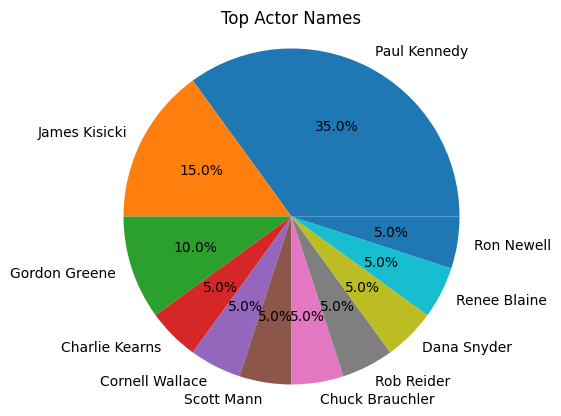

In [72]:
import matplotlib.pyplot as plt
counts = table_actor.head(20).primaryName.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.title("Top Actor Names")
plt.show()

In [60]:
table_actor.tail(10)

,primaryName,weighted_average,primaryTitle,startYear,runtimeMinutes
73933,Dyler,1.0,321 Action,2020,100
221849,Rakan Abdulwahed,1.0,321 Action,2020,100
221850,Rakan Abdulwahed,1.0,Born a King,2019,103
225198,Reha Beyoglu,1.0,Atatürk'ün Fedaisi Topal Osman,2013,90
221851,Rakan Bo Khaled,1.0,321 Action,2020,100
225199,Reha Beyoglu,1.0,Reis,2017,108
168550,Majed Fawaz,1.0,321 Action,2020,100
100068,Hana Zuhair,1.0,321 Action,2020,100
149473,Khaled Yeslam,1.0,321 Action,2020,100
44137,Ceyda Saltadal,1.0,Alkarisi: Cinnet,2015,72


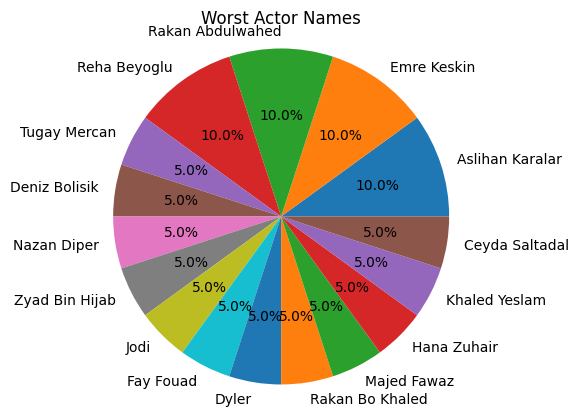

In [73]:
counts = table_actor.tail(20).primaryName.value_counts()
fig, ax = plt.subplots()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.title("Worst Actor Names")
plt.show()

In [75]:
table_actor.tail(20).to_csv('table_actor_10_tail.csv',index=False)

In [36]:
df_actor_rating1 = df_actor_rating[['primaryName', 'tconst']]
df_actor_rating1

,primaryName,tconst
0,AJ Diana,tt1549572
1,AJ Kane,tt2386490
2,AJ Littlejohn,tt3155328
3,AJ Meijer,tt15185022
4,AJ Meijer,tt2503954
...,...,...
291208,Zwi Kanar,tt0202077
291209,Zwi Kanar,tt0486580
291210,Zyad Bin Hijab,tt13423846
291211,Zygmunt Szajowski,tt4385888


In [37]:
df_actor_rating1.tconst.nunique()

67599

In [38]:
df_actor_rating1.to_csv('df_actor_avgrating.csv', index=False)

In [39]:
#df_actor_rating1.pivot_table(columns="primaryName", index=["tconst"], aggfunc=lambda x: 1, fill_value=0).reset_index()

In [40]:
link = 'https://raw.githubusercontent.com/RuiVelho/My-movie-review-prediction/main/tittle_sample_50.csv'
df_sample_50 = pd.read_csv(link)
#df_sample_50.drop(columns='Unnamed: 0', inplace=True)
df_sample_50

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Titles,pos,neg,neu,compound
0,tt0258760,movie,Lammbock,Lammbock,0,2001,\N,93,"Comedy,Crime",7.3,11622,lammbock,0.0,0.0,1.0,0.0
1,tt7984766,movie,The King,The King,0,2019,\N,140,"Biography,Drama,History",7.3,137872,king,0.0,0.0,1.0,0.0
2,tt2427220,tvSeries,Crossing Lines,Crossing Lines,0,2013,2015,43,"Action,Crime,Drama",7.3,13403,crossing line,0.0,0.0,1.0,0.0
3,tt1321510,movie,In the Heights,In the Heights,0,2021,\N,143,"Drama,Musical,Romance",7.3,49283,height,0.0,0.0,1.0,0.0
4,tt0084237,movie,The Last Unicorn,The Last Unicorn,0,1982,\N,92,"Adventure,Animation,Drama",7.3,27971,last unicorn,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,tt5988370,movie,Reis,Reis,0,2017,\N,108,"Biography,Drama",1.0,73833,real,0.0,0.0,1.0,0.0
3081,tt14878948,movie,15/07: Break of Dawn,15/07 Safak Vakti,0,2021,\N,95,"Action,Drama,War",1.1,20564,break dawn,0.0,0.0,1.0,0.0
3082,tt20255706,tvSeries,The Pogmentary,The Pogmentary,0,2022,\N,30,Documentary,1.1,13767,pogmentary,0.0,0.0,1.0,0.0
3083,tt1595842,tvMovie,Fred: The Movie,Fred: The Movie,0,2010,\N,81,"Adventure,Comedy,Family",2.0,8569,fred movie,0.0,0.0,1.0,0.0


In [41]:
#df_final = SA_titles.merge(df_actor_rating1, on='tconst', how='left')
#df_final

In [42]:
#df_final.primaryName.isna().sum()

In [43]:
""" def sample_or_not(categories, cutoff):
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            # SAMPLE
            return df.sample(n=10000, random_state=)
            # GET VALUES
        else:
            # NOT SAMPLE
            # GET VALUES

sample_or_not(df.averageRating.value_counts(), 50) """

' def sample_or_not(categories, cutoff):\n    for i in range(len(categories)):\n        if categories.values[i] >= cutoff:\n            # SAMPLE\n            return df.sample(n=10000, random_state=)\n            # GET VALUES\n        else:\n            # NOT SAMPLE\n            # GET VALUES\n\nsample_or_not(df.averageRating.value_counts(), 50) '

In [44]:
link = 'https://raw.githubusercontent.com/RuiVelho/My-movie-review-prediction/main/movies_noexplode.csv'
df_main = pd.read_csv(link)
df_main.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,Titles,pos,neg,neu,compound
0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896,\N,1,"Documentary,Short",7.4,12248,arrival train,0.000,0.0,1.000,0.0000
1,tt0000417,short,A Trip to the Moon,Le voyage dans la lune,0,1902,\N,13,"Action,Adventure,Comedy",8.2,52284,trip moon,0.000,0.0,1.000,0.0000
2,tt0000439,short,The Great Train Robbery,The Great Train Robbery,0,1903,\N,11,"Action,Adventure,Crime",7.3,20011,great train robbery,0.672,0.0,0.328,0.6249
3,tt0004972,movie,The Birth of a Nation,The Birth of a Nation,0,1915,\N,195,"Drama,War",6.2,25467,birth nation,0.000,0.0,1.000,0.0000
4,tt0008133,short,The Immigrant,The Immigrant,0,1917,\N,30,"Comedy,Drama,Romance",7.6,8786,immigrant,0.000,0.0,1.000,0.0000


In [45]:
imbtittlebasicslist = list(df_main["tconst"])
#dir_names = dir_names[dir_names["tconst"].isin(imbtittlebasicslist)]
df_actor_rating1 = df_actor_rating1[df_actor_rating1["tconst"].isin(imbtittlebasicslist)]

In [46]:
df_actor_rating1.to_csv('df_actor_avgrating.csv', index=False)

In [47]:
df_actor_rating1 = df_actor_rating1.sample(n=10000, random_state=42)

In [48]:
df_actor_rating1_pivot = df_actor_rating1.pivot_table(columns="primaryName", index=["tconst"], aggfunc=lambda x: 1, fill_value=0).reset_index()
df_actor_rating1_pivot

primaryName,tconst,Aadukalam Naren,Aansh Lohia,Aaran Thomas,Aaron Beall,Aaron Cobb,Aaron Denkel,Aaron Jackson,Aaron Kaplan,Aaron Kirman,...,Zoraide Coleto,Zoran Milosevic,Zoran Radmilovic,Zoreh Ramsey,Zoro Saro Manuel Daghlian,Zoubida Akif,Zozibini Tunzi,Zsuzsanna Roe,Zura Gelashvili,Zvee Scooler
0,tt0004972,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0012349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0013442,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0014341,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0015064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,tt9817070,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5508,tt9851854,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5509,tt9853500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5510,tt9900782,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_actor_rating1_pivot.to_csv('final_actor_pivot.csv', index=False) 

In [54]:
actor_names = df_actor_rating1_pivot.columns.drop('tconst').tolist()

In [56]:
file_path = 'column_list.txt'

with open(file_path, 'w') as file:
    # Write the list elements to the file, separated by newlines
    for item in actor_names:
        file.write(str(item) + '\n')